[https://blog.osmanballi.com](https://blog.osmanballi.com)

![](https://i.giphy.com/media/1ZDHH6zox36D1vfNsE/200w.webp)

# Transfer Learning

Learning transfer is a method of machine learning that stores the information that it receives when solving a problem, just like us, and uses that information when it encounters another problem. With learning transfer, models that show higher success and learn faster with less educational data are obtained using previous information.

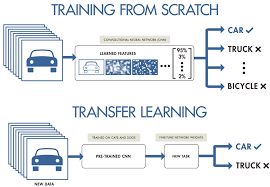

Normally a separate ‘learning from scratch’ is performed for each task in machine learning. But since it is possible and advantageous to use a number of information learned from some tasks in other tasks, the information obtained from the source tasks is used to solve the target task. Features and weights derived from previously trained models with learning transfer are used for a new task. For this method to work, the information to be transferred must be general information, meaning that instead of being specific to the source task, the information that is appropriate for both the source and target tasks is transferred.

# What are we going to do with this study?

![](https://miro.medium.com/max/1000/1*LUFUl_8fqS97nUzpcFjgWw.png)

First, we will apply CNN to the data set of numbers. CNN also gives us an attribute layer after convalution and pooling operations. We will apply KNN,SVM and Decision Tree machine learning methods to this layer. We will compare the achievements achieved.

# Let's go to study let...

# *- Editing of data*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
Sample=pd.read_csv("../input/digit-recognizer/sample_submission.csv")
print(Sample.head(10))
print(Sample.shape)

In [ ]:
Train=pd.read_csv("../input/digit-recognizer/train.csv")
print(Train.shape)
Train.head(10)

In [ ]:
Test=pd.read_csv("../input/digit-recognizer/test.csv")
print(Test.shape)
Test.head(10)


In [ ]:
x_Train=Train.drop(labels="label",axis=1)
y_Train=Train["label"]
y_Train.head(10)

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y_Train,palette="icefire")
plt.title("number of digit classes")
y_Train.value_counts()

In [ ]:
img=x_Train.iloc[3].values
img=img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(y_Train[3])
plt.axis("off")
plt.show()

In [ ]:
x_Train=x_Train/255
x_Test=Test/255
x_Train=x_Train.values.reshape(-1,28,28,1)
x_Test=x_Test.values.reshape(-1,28,28,1)
print("x train shape",x_Train.shape)
print("x test shape",x_Test.shape)

*target values reserved for machine learning*

In [ ]:
X_train, X_val, ml_train, ml_val = train_test_split(x_Train, y_Train, test_size = 0.1, random_state=2)

*target values reserved for CNN*

In [ ]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(y_Train,num_classes=10)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_Train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

# *-Creation of the model*

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
#
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2),name='feature_layer'))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

*In this model, 196 features are created from each 28x28 image. By looking at the Flatten layer, you can see the number of features to create.*

In [ ]:
model.summary()

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50 # for better result increase the epochs
batch_size = 250
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.plot(history.history['accuracy'], 'o-', color = '#9900CC')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The reason for low educational achievement here may be due to the use of a small number of epochs or filters.

In [ ]:
y_pred = model.predict(X_val)
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_val = np.argmax(Y_val, 1) # Decode labels

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracies = []
def confusion(y_true,y_pred):
    fig = plt.figure(figsize=(8,8)) # Set Figure
    mat = confusion_matrix(y_true, y_pred) # Confusion matrix

    # Plot Confusion matrix
    sns.set(font_scale=2)
    sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.YlGnBu,fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values');
    plt.show();
    print(accuracy_score(y_true,y_pred))
    accuracies.append(accuracy_score(y_true,y_pred))

In [ ]:
confusion(Y_val,Y_pred)

# Data Transfer

*In this part, we will take the new features from the model and apply machine learning methods*

In [ ]:
from keras.models import Model
new_model=Model(inputs=model.input,outputs=model.get_layer('feature_layer').output)

In [ ]:
train_x=new_model.predict(X_train)
test_x=new_model.predict(X_val)
print(train_x.shape)
print(test_x.shape)

In [ ]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2]*train_x.shape[3])
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2]*test_x.shape[3])
print(train_x.shape)
print(test_x.shape)

# KNN

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, ml_train)
train_accuracy = knn.score(train_x, ml_train)
test_accuracy = knn.score(test_x, ml_val) 
print(train_accuracy)
print(test_accuracy)
y_pred = knn.predict(test_x)

In [ ]:
confusion(ml_val,y_pred)

# SVM

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(train_x, ml_train)
#Predict the response for test dataset
y_pred = clf.predict(test_x)
confusion(ml_val,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(ml_val,y_pred)

# Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, ml_train)
y_pred = clf.predict(test_x)
confusion(ml_val,y_pred)

In [ ]:
accuracies

# Comparison of Test Accuracies

In [ ]:
Labels = ["DLNN","KNN","SVM","DT"]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Method', 'Accuracies'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[Labels, # 1st column
                       accuracies], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

# Result

If you look at the results of the tried methods, it seems that the success of the test is very high. But looking at DLNN (Deep Learning Neural Network), it seems that training accuracy is low. This value can be increased by increasing the number of filters or epochs. The reason we use a small number of filters in this study is to reduce the number of features and get results in less time than long-term methods such as knn. If you want, you can observe how the results change by playing with these values. Thank you for reading.

# *Please don't forget like this tutorial and follow me! *

![](https://i.giphy.com/media/diUKszNTUghVe/giphy.webp)